In [1]:
import pandas as pd

# Read data from the text file
with open('adaptive_output.txt', 'r') as file:
    lines = file.readlines()

# Initialize empty dataframes for each road
road1_data = []
road2_data = []
road3_data = []
road4_data = []

# Iterate through the lines and organize data into respective lists for each road
for i, line in enumerate(lines):
    start_time, end_time, vehicles_crossed = line.strip().split()
    road_num = i % 4  # Determine which road this line belongs to
    if road_num == 0:
        road1_data.append({'start_time': int(start_time), 'end_time': int(end_time), 'vehicles_crossed': int(vehicles_crossed)})
    elif road_num == 1:
        road2_data.append({'start_time': int(start_time), 'end_time': int(end_time), 'vehicles_crossed': int(vehicles_crossed)})
    elif road_num == 2:
        road3_data.append({'start_time': int(start_time), 'end_time': int(end_time), 'vehicles_crossed': int(vehicles_crossed)})
    else:
        road4_data.append({'start_time': int(start_time), 'end_time': int(end_time), 'vehicles_crossed': int(vehicles_crossed)})

# Convert lists to dataframes
road1_df = pd.DataFrame(road1_data)
road2_df = pd.DataFrame(road2_data)
road3_df = pd.DataFrame(road3_data)
road4_df = pd.DataFrame(road4_data)

In [2]:
road1_df.head()

,start_time,end_time,vehicles_crossed
0,0,20,6
1,70,89,38
2,154,180,76
3,246,278,126
4,347,386,179


In [3]:
road2_df.head()

,start_time,end_time,vehicles_crossed
0,25,35,20
1,94,116,57
2,185,210,95
3,283,310,133
4,391,432,190


In [4]:
road3_df.head()

,start_time,end_time,vehicles_crossed
0,40,50,2
1,121,131,13
2,215,226,30
3,315,327,47
4,437,447,58


In [5]:
road4_df.head()

,start_time,end_time,vehicles_crossed
0,55,65,5
1,136,149,27
2,231,241,36
3,332,342,48
4,452,463,63


In [6]:
# Calculate the difference to get the normal values for vehicles_crossed column
for df in [road1_df, road2_df, road3_df, road4_df]:
    df['vehicles_crossed'] = df['vehicles_crossed'].diff().fillna(df['vehicles_crossed']).astype(int)

In [7]:
road4_df.head()

,start_time,end_time,vehicles_crossed
0,55,65,5
1,136,149,22
2,231,241,9
3,332,342,12
4,452,463,15


In [8]:
# Calculate traffic flow rate for each row for each road
road1_df['flow_rate'] = road1_df['vehicles_crossed'] / (road1_df['end_time'] - road1_df['start_time']).astype('int64')
road2_df['flow_rate'] = road2_df['vehicles_crossed'] / (road2_df['end_time'] - road2_df['start_time']).astype('int64')
road3_df['flow_rate'] = road3_df['vehicles_crossed'] / (road3_df['end_time'] - road3_df['start_time']).astype('int64')
road4_df['flow_rate'] = road4_df['vehicles_crossed'] / (road4_df['end_time'] - road4_df['start_time']).astype('int64')

# Calculate the average flow rate for each road
road1_avg_flow_rate = road1_df['flow_rate'].mean()
road2_avg_flow_rate = road2_df['flow_rate'].mean()
road3_avg_flow_rate = road3_df['flow_rate'].mean()
road4_avg_flow_rate = road4_df['flow_rate'].mean()

# Calculate the average flow rate for the entire intersection
intersection_avg_flow_rate = (road1_df['flow_rate'].sum() + road2_df['flow_rate'].sum() + 
                              road3_df['flow_rate'].sum() + road4_df['flow_rate'].sum()) / (
                              len(road1_df) + len(road2_df) + len(road3_df) + len(road4_df))

# Display the traffic flow rates
print("Average Traffic Flow Rate for Road 1:", road1_avg_flow_rate, "vehicles/second")
print("Average Traffic Flow Rate for Road 2:", road2_avg_flow_rate, "vehicles/second")
print("Average Traffic Flow Rate for Road 3:", road3_avg_flow_rate, "vehicles/second")
print("Average Traffic Flow Rate for Road 4:", road4_avg_flow_rate, "vehicles/second")
print("Average Traffic Flow Rate for the Whole Intersection:", intersection_avg_flow_rate, "vehicles/second")

Average Traffic Flow Rate for Road 1: 1.3557940284444043 vehicles/second
Average Traffic Flow Rate for Road 2: 1.4038420588731886 vehicles/second
Average Traffic Flow Rate for Road 3: 0.9659965417538292 vehicles/second
Average Traffic Flow Rate for Road 4: 0.9846815986333272 vehicles/second
Average Traffic Flow Rate for the Whole Intersection: 1.1775785569261874 vehicles/second


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
traffic_flow_rates = {
    'Road1': road1_avg_flow_rate,
    'Road2': road2_avg_flow_rate,
    'Road3': road3_avg_flow_rate,
    'Road4': road4_avg_flow_rate
}

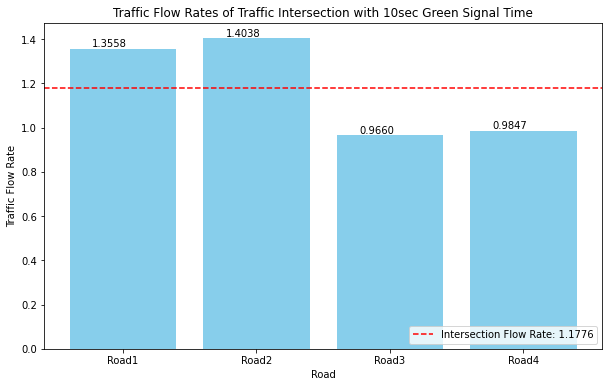

In [11]:
# Plot traffic flow rates
plt.figure(figsize=(10, 6))
bars = plt.bar(traffic_flow_rates.keys(), traffic_flow_rates.values(), color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.axhline(y=intersection_avg_flow_rate, color='r', linestyle='--', label=f'Intersection Flow Rate: {intersection_avg_flow_rate:.4f}')
plt.xlabel('Road')
plt.ylabel('Traffic Flow Rate')
plt.title('Traffic Flow Rates of Traffic Intersection with 10sec Green Signal Time')
plt.legend(loc='lower right')
plt.show()

In [12]:
# Concatenate 'vehicles_crossed' columns from each dataframe
df = pd.concat([road1_df['vehicles_crossed'], road2_df['vehicles_crossed'], 
                road3_df['vehicles_crossed'], road4_df['vehicles_crossed']], axis=1)

# Rename columns
df.columns = ['Road1', 'Road2', 'Road3', 'Road4']

In [13]:
df.head()

,Road1,Road2,Road3,Road4
0,6,20,2,5
1,32,37,11,22
2,38,38,17,9
3,50,38,17,12
4,53,57,11,15


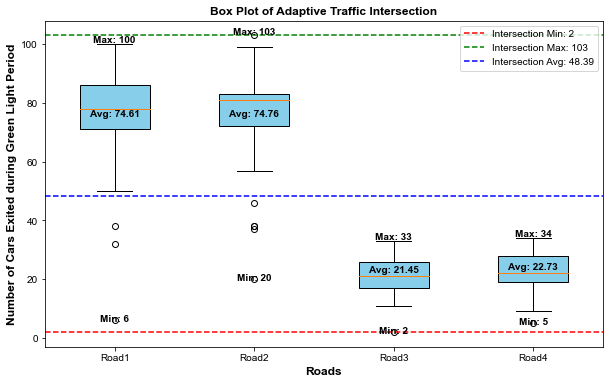

In [18]:
from matplotlib import rcParams

# Set font family and size
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 10

# Define colors for the box plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plot box plot with custom colors
plt.figure(figsize=(10, 6))

# Calculate min, max, and average for the intersection
intersection_min = df.min().min()
intersection_max = df.max().max()
intersection_avg = df.mean().mean()

# Plot each box individually with custom colors
for i, column in enumerate(df.columns):
    box = plt.boxplot(df[column], positions=[i], patch_artist=True, widths=0.5)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Calculate min, max, and average
    min_val = df[column].min()
    max_val = df[column].max()
    avg_val = df[column].mean()

    # Add annotations
    plt.text(i, min_val - 0.5, f'Min: {min_val}', horizontalalignment='center', fontsize=10, fontweight='bold')
    plt.text(i, max_val + 0.5, f'Max: {max_val}', horizontalalignment='center', fontsize=10, fontweight='bold')
    plt.text(i, avg_val, f'Avg: {avg_val:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, fontweight='bold')

# Plot intersection statistics lines
plt.axhline(y=intersection_min, color='r', linestyle='--', label=f'Intersection Min: {intersection_min}')
plt.axhline(y=intersection_max, color='g', linestyle='--', label=f'Intersection Max: {intersection_max}')
plt.axhline(y=intersection_avg, color='b', linestyle='--', label=f'Intersection Avg: {intersection_avg:.2f}')

plt.title('Box Plot of Adaptive Traffic Intersection', fontsize=12, fontweight='bold')
plt.xlabel('Roads', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cars Exited during Green Light Period', fontsize=12, fontweight='bold')
plt.legend()
plt.xticks(range(len(df.columns)), df.columns)  # Set x-ticks to road names
plt.grid(False)  # Turn off grid
plt.show()

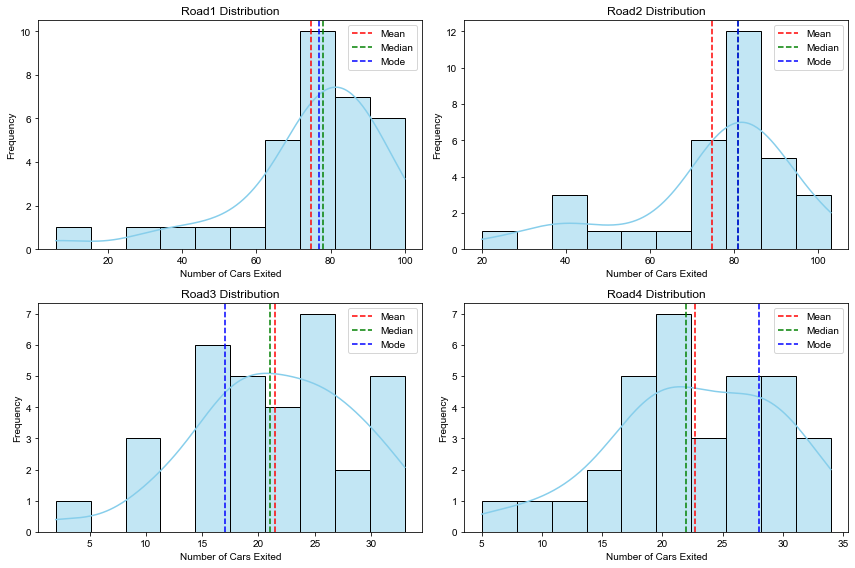

In [15]:
import scipy.stats as stats

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through each road
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=10)  # Plot histogram
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')  # Plot mean
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')  # Plot median
    mode = stats.mode(df[col])[0][0]  # Calculate mode
    plt.axvline(mode, color='b', linestyle='--', label='Mode')  # Plot mode
    plt.title(f'{col} Distribution')
    plt.xlabel('Number of Cars Exited')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

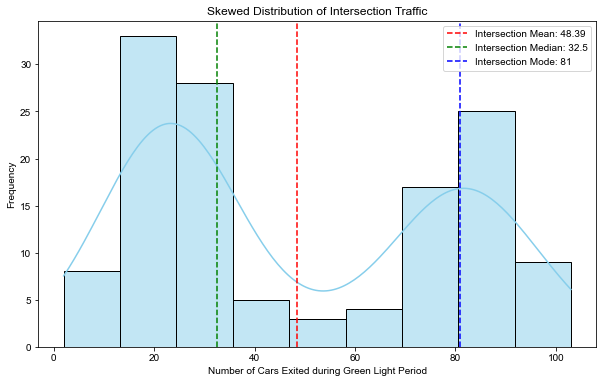

In [16]:
# Flatten the DataFrame into a single column
intersection_data = df.values.flatten()

# Calculate mean, median, and mode for the intersection
intersection_mean = intersection_data.mean()
intersection_median = np.median(intersection_data)  # Corrected
intersection_mode = pd.Series(intersection_data).mode()[0]  # mode() returns a Series, so we get the first value

# Plot skewed distribution
plt.figure(figsize=(10, 6))
sns.histplot(intersection_data, kde=True, color='skyblue')

# Plot vertical lines for mean, median, and mode
plt.axvline(x=intersection_mean, color='r', linestyle='--', label=f'Intersection Mean: {intersection_mean:.2f}')
plt.axvline(x=intersection_median, color='g', linestyle='--', label=f'Intersection Median: {intersection_median}')
plt.axvline(x=intersection_mode, color='b', linestyle='--', label=f'Intersection Mode: {intersection_mode}')

plt.title('Skewed Distribution of Intersection Traffic')
plt.xlabel('Number of Cars Exited during Green Light Period')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

plt.show()

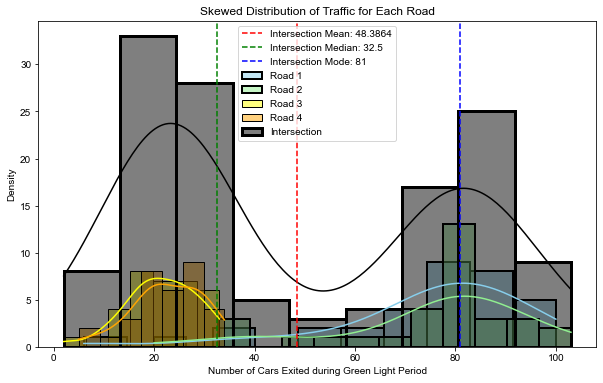

In [17]:
# Plot skewed distribution curve for each road with different colors
plt.figure(figsize=(10, 6))

road_data1 = df['Road1']
road_data2 = df['Road2']
road_data3 = df['Road3']
road_data4 = df['Road4']

sns.histplot(road_data1, kde=True, label='Road 1', alpha=0.5, color='skyblue', linewidth=2)
sns.histplot(road_data2, kde=True, label='Road 2', alpha=0.5, color='lightgreen', linewidth=2)
sns.histplot(road_data3, kde=True, label='Road 3', alpha=0.5, color='yellow', linewidth=1)
sns.histplot(road_data4, kde=True, label='Road 4', alpha=0.5, color='orange', linewidth=1)

# Plot histogram and density curve for the entire intersection
intersection_data = df.values.flatten()
sns.histplot(intersection_data, kde=True, color='black', label='Intersection', linewidth=3)

# Calculate mean, median, and mode for the intersection
intersection_mean = np.mean(intersection_data)
intersection_median = np.median(intersection_data)
intersection_mode = pd.Series(intersection_data).mode()[0]

# Plot vertical lines for mean, median, and mode of intersection
plt.axvline(x=intersection_mean, color='r', linestyle='--', label=f'Intersection Mean: {intersection_mean:.4f}')
plt.axvline(x=intersection_median, color='g', linestyle='--', label=f'Intersection Median: {intersection_median}')
plt.axvline(x=intersection_mode, color='b', linestyle='--', label=f'Intersection Mode: {intersection_mode}')

plt.title('Skewed Distribution of Traffic for Each Road')
plt.xlabel('Number of Cars Exited during Green Light Period')
plt.ylabel('Density')
plt.legend()
plt.grid(False)

plt.show()